In [1]:
import numpy as np
import scipy as sp
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

import statsmodels.api as sm
from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression

In [2]:
np.random.seed(1)

# data

In [3]:
xtrain=2*np.random.randn(50)
ytrain=np.exp(-xtrain**2)+0.05*np.random.randn(50)

xtest=2*np.random.randn(50)
ytest=np.exp(-xtest**2)+0.05*np.random.randn(50)

# ploting

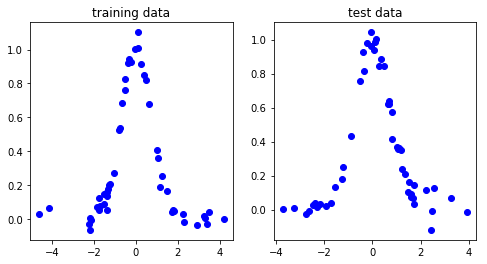

In [4]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
ax1.plot(xtrain,ytrain,'bo')
ax2.plot(xtest,ytest,'bo')
ax1.set_title('training data')
ax2.set_title('test data')
plt.show()

# model(lowess_regression)

In [5]:
l = sm.nonparametric.lowess(ytrain,xtrain,frac=0.08)
f = interp1d(l[:,0],l[:,1])

yhat_train = f(xtrain)
yhat_test = f(xtest)

In [6]:
def myplot(yhat_train, yhat_test):
    f,(ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
    
    ax1.plot(xtrain,ytrain,'bo')
    tmp = pd.DataFrame({'x':xtrain,'y':yhat_train}).sort_values('x')
    
    ax1.plot(tmp['x'],tmp['y'],'r',linewidth=2)
    ax1.set_title('Train RMSE %.4f'%np.sqrt( ((ytrain-yhat_train)**2).mean() ))
    
    ax2.plot(xtest,ytest,'bo')
    tmp = pd.DataFrame({'x':xtest,'y':yhat_test}).sort_values('x')
    
    ax2.plot(tmp['x'],tmp['y'],'r',linewidth=2)
    ax2.set_title('Test RMSE %.4f'%np.sqrt( ((ytest-yhat_test)**2).mean() ))

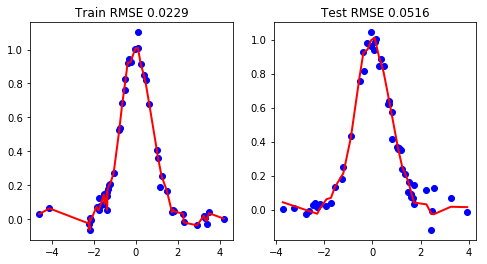

In [7]:
myplot(yhat_train,yhat_test)
plt.show()